**This is the exploratory data analysis notebook**

In [1]:
from re import search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# change the path accordingly to your directory
directory_path = "C:\\Users\\Gajavalli's\\Documents\\MS projects\\venky uk - sentiment analysis\\data\\"

fake_news_filename = 'Fake.csv'
true_news_filename = 'True.csv'

# Load the dataset

In [3]:
fake_df = pd.read_csv(directory_path + fake_news_filename)

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df = pd.read_csv(directory_path + true_news_filename)

In [6]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
true_df['label'] = 'true'
fake_df['label'] = 'fake'

In [8]:
from re import search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.concat([fake_df, true_df], ignore_index=True)

In [9]:
df.shape

(44898, 5)

# Clean the dataset

## Checking missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [11]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

**Observations:**

There are no null values

## Checking for  duplicates

### Title column

In [12]:
title_value_counts = df.title.value_counts()

In [13]:
title_value_counts[title_value_counts > 1]

Factbox: Trump fills top jobs for his administration                                                                                                       14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                                                            8
Factbox: Contenders for senior jobs in Trump's administration                                                                                               8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                                       6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                                                   6
                                                                                                                                                           ..
WHY IS AL SHARPTON’S “Half-Brother” Registering Thou

**Observations:**
1. There are lot of titles that are used more than once. These titles need be reviewed.
2. I will start with title which has more occurecens. i.e 'Factbox: Trump fills top jobs for his administration'

In [14]:
df[df.title == 'Factbox: Trump fills top jobs for his administration']

,title,text,subject,date,label
29701,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 19, 2017",true
29875,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 11, 2017",true
30096,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 21, 2016",true
30118,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 19, 2016",true
30136,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 17, 2016",true
30167,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 15, 2016",true
30186,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30220,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30236,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 12, 2016",true
30289,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 8, 2016",true


In [15]:
df.iloc[29701].text

'(Reuters) - U.S. President-elect Donald Trump will name former Georgia Governor Sonny Perdue as his nominee for secretary of agriculture on Thursday, a senior transition official said on Wednesday. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Gro

In [16]:
df.iloc[29875].text

'(Reuters) - U.S. President-elect Donald Trump on Wednesday announced he has chosen David Shulkin, who currently heads the Department of Veterans Affairs healthcare system, to head the agency. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Group Inc

**Observations:**

1. This is title seems to be a story title that Reuters but changing the underlying story.
2. Next I'll make a dataframe with all the data with duplicate titles

In [17]:
duplicate_title_list = set(title_value_counts[title_value_counts > 1].keys())

In [18]:
df_dup_titles = df[df.title.isin(duplicate_title_list)]

In [19]:
df_dup_titles

,title,text,subject,date,label
1488,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",fake
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",fake
9087,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,politics,"Dec 31, 2017",fake
9088,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,"Dec 31, 2017",fake
9089,“CONSERVATIVE GAY GUY” BLASTS Pence’s Aspen Ne...,It s been said that good fences make good neig...,politics,"Dec 30, 2017",fake
...,...,...,...,...,...
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",true
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",true
44887,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true


**Observations**

1.Some rows may be complete duplicates (44887 and 44889) and others may be duplicates except for the date (1488 and 1535)

In [20]:
df_dup_titles[df_dup_titles.duplicated()]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
23926,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",true
24259,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",true
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


**Observations:**

1. There are 209 rows with duplicate data that need to be deleted
2. Checking another situation where text is having duplicate data

In [21]:
df_dup_titles[df_dup_titles.duplicated(['text'])]

,title,text,subject,date,label
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",fake
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",fake
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


**Observations:**

1. There are 5964 rows with duplicate text data.
2. Some of the rows are having with out any data in text column those need to be adjusted later.
3. Need to check the duplicate rows with combination of text and title colums

In [22]:
df_dup_titles[df_dup_titles.duplicated(['title', 'text'])]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
15892,HOUSE INTEL Slaps Subpoenas on McCain Institut...,Please see our previous report below on the Mc...,Government News,"Dec 27, 2017",fake
15893,PRICELESS! WATCH MSNBC HOST’S Shocked Response...,THIS IS PRICELESS! The video below shows just ...,Government News,"Dec 26, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


**Observations:**

1. There are 5793 rows with duplicate title and text data.
2. Only 171 rows having duplicate text but not title.
3. Need to check the rows with empty data.

In [23]:
df_dup_titles[df_dup_titles.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
11247,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,,politics,"Mar 30, 2017",fake
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",fake
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake


**Summary of Observations for title column**:
    
1. There are more than 171 rows with text data as empty.
2. There are close to 11,800 rows that have titles used multiple times.
3. Used duplicate titles seems to be a usual practice and few of them revisions.
4. The duplicate titles considered to Ok, but duplicate rows, rows having similar text, rows without text need to be deleted from the dataframe.

### Text column

In [24]:
# Checking for the text data with one space
df[df['text'] == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",fake


In [25]:
# Replacing the space with nan values in text colum
df = df.replace(r'^\s*$', np.nan, regex=True)

In [26]:
df.isnull().sum()

title        0
text       631
subject      0
date         0
label        0
dtype: int64

**Summary of Observations for text column**:
    
There are 631 rows with no text is small compared with entire large dataset, thus should be deleted from the df 

### Remove duplicate data

In [27]:
# Entire data set rows
len(df)

44898

In [28]:
df_clean = df.drop_duplicates(ignore_index=True)

In [29]:
len(df_clean)

44689

In [30]:
# Drop Rows with No Text (just a title)
df_clean = df_clean.dropna()

In [31]:
len(df_clean)

44058

In [32]:
#Drop Rows with same title and text (keeping the first instance)
df_clean = df_clean.drop_duplicates(['title', 'text'], ignore_index=True)

In [33]:
len(df_clean)

38658

In [34]:
# Drop Rows with the same text (keeping the first instance)
df_clean = df_clean.drop_duplicates(['text'], ignore_index=True)

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38644 non-null  object
 1   text     38644 non-null  object
 2   subject  38644 non-null  object
 3   date     38644 non-null  object
 4   label    38644 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [36]:
# Number of rows that dropped
len(df) - len(df_clean)

6254

## Cleaning the date column

In [37]:
# Checking the date value with for a valid format
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print("Few of the date values are not valid")

Few of the date values are not valid


In [38]:
# Flitering the date values that are not dates
def invalid_dates(string):
    try:
        date = pd.to_datetime(string)
        return False
    except ValueError:
        return True
        

In [39]:
df_bad_dates = df_clean[df_clean['date'].apply(invalid_dates)]
df_bad_dates

,title,text,subject,date,label
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,fake
15119,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,fake
15120,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,fake
15422,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
15423,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
16126,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,fake


In [40]:
# The instances with text in the date field are all invalid data and will be dropped
df_clean = df_clean.drop(df_bad_dates.index)

In [41]:
# Converting the datesto datetime type
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print("Few of the date values are not valid")

In [42]:
df_clean.date.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   38638
unique                   1010
top       2017-12-06 00:00:00
freq                      177
first     2015-03-31 00:00:00
last      2018-02-19 00:00:00
Name: date, dtype: object

**Summary of Observations for date column**:
    
1. All the date columns are converted to datetime type
2. It contains data from 2015 to 2018

# Exploration of dataset

## Visualization function

In [43]:
def visualization(df, column, title):
    
    plt.figure(figsize=(16,8))
    df[df.label == 'true'][column].hist(label='True')
    df[df.label == 'fake'][column].hist(alpha=0.4, label='Fake')
    plt.title(title)
    plt.legend()
    plt.show()

## Distribution of target variable

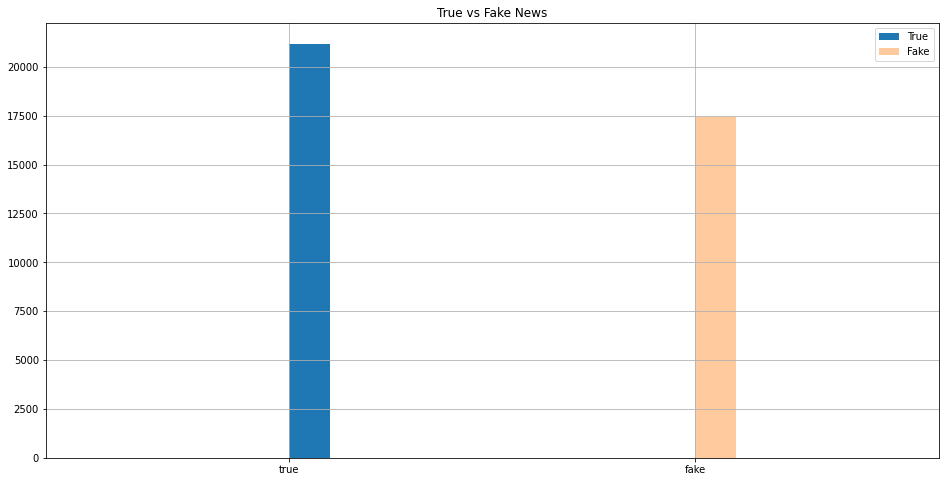

In [44]:
visualization(df_clean, 'label', 'True vs Fake News')

**Observations**

After cleaning the dataset it has become more balanced so hopefully models will be generalized.

## Distribution of news over the date

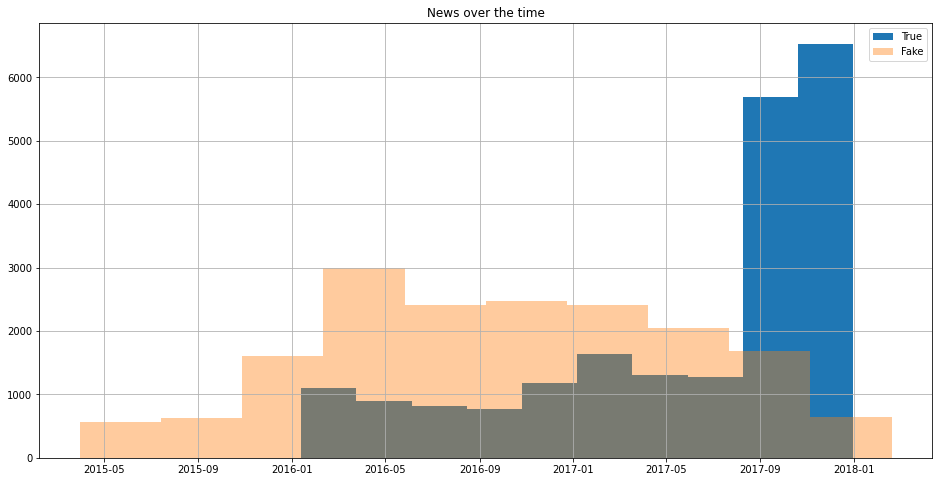

In [45]:
visualization(df_clean, 'date', 'News over the time')

**Observations**

1. There is a more even distribution of True vs Fake across time between 2016 Jan to 2017 Aug.
2. After 2017 Sep True news over distributed than Fake news, 
   it may give the classification models some trouble, or overfit to the dataset. We will handle this later.

## Analysis of Titles character count

In [46]:
df_clean['title_len'] = df_clean.title.apply(len)

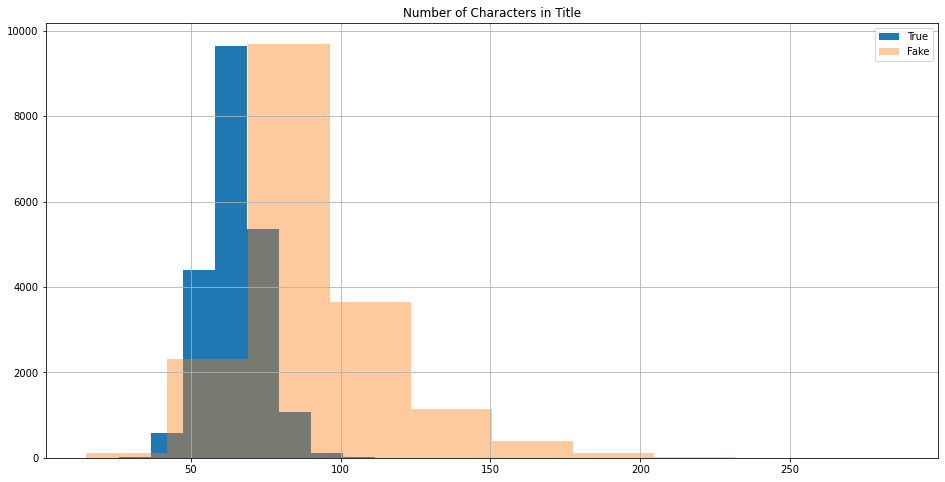

In [47]:
visualization(df_clean, 'title_len', 'Number of Characters in Title')

In [48]:
df_clean[df_clean.label == 'true'].title_len.describe()

count    21191.000000
mean        64.660233
std          9.159722
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: title_len, dtype: float64

In [49]:
df_clean[df_clean.label == 'fake'].title_len.describe()

count    17447.000000
mean        91.217000
std         24.505484
min         15.000000
25%         77.000000
50%         88.000000
75%        100.000000
max        286.000000
Name: title_len, dtype: float64

**Observations**

1. Fake news stories have a wider range in the length of title than True, 
   and those Fake news titles have a higher median & mean than True ones.
2. The first quartile for Fake news is longer in length than the 3rd quartile for true news.

## Analysis of text character count

In [50]:
df_clean['text_len'] = df_clean.text.apply(len)

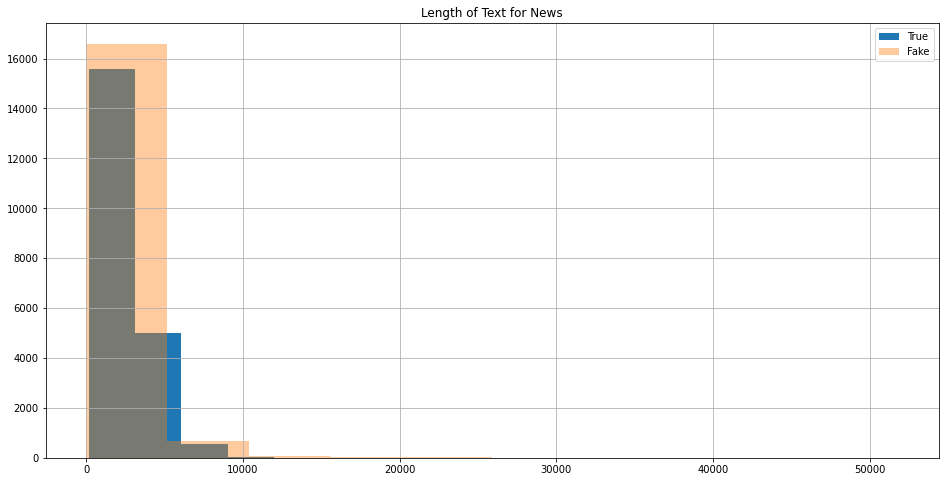

In [51]:
visualization(df_clean, 'text_len', 'Length of Text for News')

In [52]:
df_clean[df_clean.label == 'true'].text_len.describe()

count    21191.000000
mean      2378.527158
std       1683.781664
min        152.000000
25%        906.500000
50%       2216.000000
75%       3226.500000
max      29781.000000
Name: text_len, dtype: float64

In [53]:
df_clean[df_clean.label == 'fake'].text_len.describe()

count    17447.000000
mean      2550.912936
std       2201.223680
min          5.000000
25%       1650.000000
50%       2235.000000
75%       3006.000000
max      51794.000000
Name: text_len, dtype: float64

**Observations**:
1. Most of the news are below 10k character length.
2. There are some really long news stories (over 10K characters). We will analyze further.
3. The bulk of the Fake and True news stories are about the same length.
4. When looking at the 2nd and 3rd quartile values,the fake news stories have a higher max and         significantly higher 1st quartile value.

## Analysis of Capital Letters in Title

In [54]:
df_clean['caps_in_title'] = df_clean['title'].apply(lambda title: sum(1 for char in title if char.isupper()))

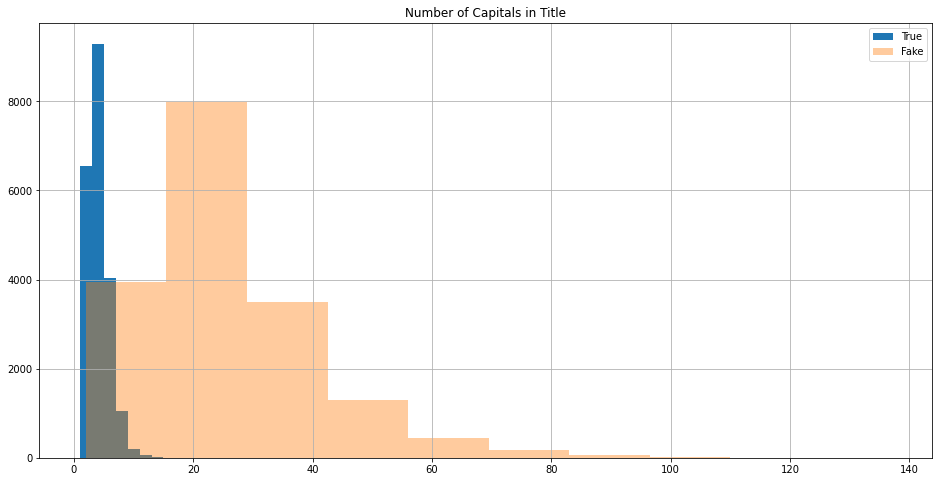

In [56]:
visualization(df_clean, 'caps_in_title', 'Number of Capitals in Title')

In [57]:
df_clean[df_clean.label == 'true'].caps_in_title.describe()

count    21191.000000
mean         3.546128
std          1.783526
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: caps_in_title, dtype: float64

In [58]:
df_clean[df_clean.label == 'fake'].caps_in_title.describe()

count    17447.000000
mean        25.689689
std         13.982261
min          2.000000
25%         16.000000
50%         22.000000
75%         32.000000
max        137.000000
Name: caps_in_title, dtype: float64

**Observations**:
1. The fake news are having more capitals rather than true news. The fake news title length are longer than true news
   so that is part of it.

In [59]:
# Normalizing the counts

df_clean['norm_caps_in_title'] = df_clean['caps_in_title'] / df_clean['title_len']

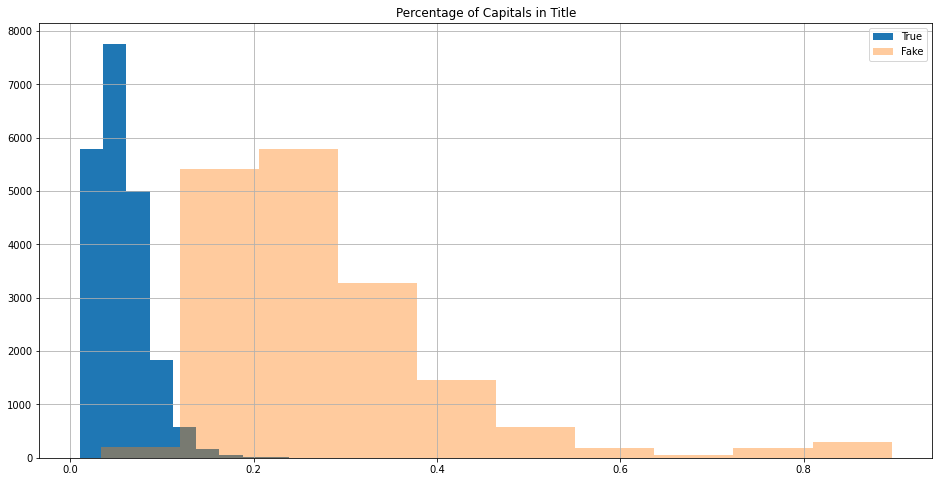

In [60]:
visualization(df_clean, 'norm_caps_in_title', 'Percentage of Capitals in Title')

In [61]:
df_clean[df_clean.label == 'true'].norm_caps_in_title.describe()

count    21191.000000
mean         0.055279
std          0.027712
min          0.010526
25%          0.034483
50%          0.050847
75%          0.070175
max          0.264151
Name: norm_caps_in_title, dtype: float64

In [62]:
df_clean[df_clean.label == 'fake'].norm_caps_in_title.describe()

count    17447.000000
mean         0.280398
std          0.134694
min          0.033708
25%          0.191781
50%          0.246914
75%          0.330357
max          0.895833
Name: norm_caps_in_title, dtype: float64

**Observations**:
1. There is less overlap while observing the % of caps in title for fake vs true

## Analysis of Capital Letters in Text

In [64]:
df_clean['caps_in_text'] = df_clean['text'].apply(lambda text: sum(1 for char in text if char.isupper()))

In [65]:
df_clean['norm_caps_in_text'] = df_clean['caps_in_text'] / df_clean['text_len']

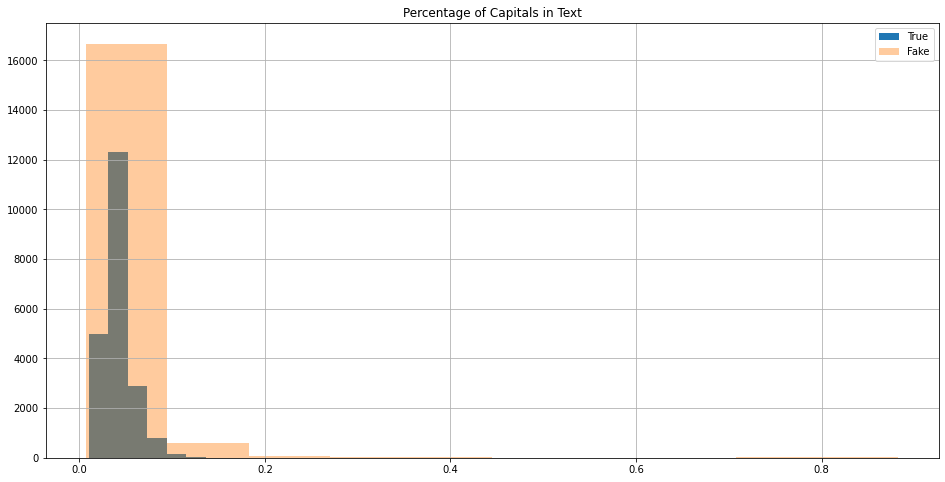

In [66]:
visualization(df_clean, 'norm_caps_in_text', 'Percentage of Capitals in Text')

In [67]:
df_clean[df_clean.label == 'true'].norm_caps_in_text.describe()

count    21191.000000
mean         0.041764
std          0.015244
min          0.010239
25%          0.031744
50%          0.038193
75%          0.047673
max          0.220690
Name: norm_caps_in_text, dtype: float64

In [68]:
df_clean[df_clean.label == 'fake'].norm_caps_in_text.describe()

count    17447.000000
mean         0.045016
std          0.044842
min          0.007538
25%          0.029395
50%          0.036131
75%          0.047068
max          0.882353
Name: norm_caps_in_text, dtype: float64

**Observations**:

1. Contrast to the title great overlap of true vs fake news.

# Save the cleaned_df

In [71]:
df_clean.to_csv(directory_path + 'news_dataset_cleaned.csv', index=False)